# 1. Install Dependencies and Setup

In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [ ]:
!pip list

In [1]:
import tensorflow as tf
import os

# 2. Remove dodgy images

In [2]:
import cv2
import imghdr #check the extensions of the images

In [3]:
data_dir = 'data' 

In [4]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [11]:
img = cv2.imread(os.path.join("data","happy","154006829.jpg"))

In [12]:
img.shape

(3744, 5616, 3)

In [14]:
img

array([[[ 12,  29,  32],
        [ 10,  29,  32],
        [  9,  28,  31],
        ...,
        [  1,  23,  18],
        [  3,  24,  21],
        [  3,  21,  20]],

       [[ 19,  31,  35],
        [ 15,  30,  33],
        [ 18,  35,  38],
        ...,
        [  0,  23,  18],
        [ 10,  24,  22],
        [  0,  21,  18]],

       [[ 17,  32,  35],
        [ 15,  27,  31],
        [ 22,  37,  40],
        ...,
        [  3,  17,  13],
        [  1,  20,  17],
        [  3,  22,  19]],

       ...,

       [[155,  99, 212],
        [152,  90, 210],
        [159, 101, 209],
        ...,
        [ 82, 114, 149],
        [ 88, 121, 154],
        [ 96, 129, 162]],

       [[157, 102, 211],
        [151,  90, 210],
        [159, 100, 212],
        ...,
        [ 85, 120, 153],
        [ 89, 123, 153],
        [ 92, 126, 156]],

       [[158, 100, 209],
        [148,  90, 208],
        [153,  97, 210],
        ...,
        [ 82, 116, 152],
        [ 82, 116, 152],
        [ 86, 118, 153]]

In [7]:
import matplotlib.pyplot as plt

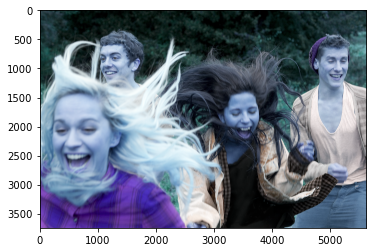

In [13]:
plt.imshow(img)

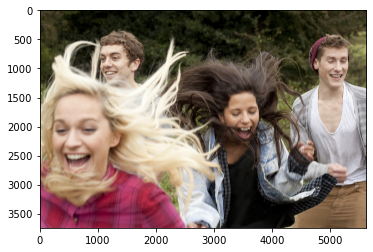

In [19]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [20]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [21]:
import numpy as np
from matplotlib import pyplot as plt

In [22]:
tf.data.Dataset?? #?? for documentation

In [23]:
tf.keras.utils.image_dataset_from_directory??

In [24]:
data = tf.keras.utils.image_dataset_from_directory('data') #data pipeline

Found 171 files belonging to 2 classes.


In [25]:
data

<BatchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [26]:
data_iterator = data.as_numpy_iterator() #allows to access the pipeline through a loop

In [27]:
data_iterator

In [34]:
#get another batch from the iterator
batch = data_iterator.next() #grabing one batch

In [35]:
batch

(array([[[[2.28609375e+02, 2.45609375e+02, 2.01609375e+02],
          [2.30084961e+02, 2.47084961e+02, 2.03084961e+02],
          [2.29453125e+02, 2.48453125e+02, 2.03453125e+02],
          ...,
          [1.40829102e+02, 2.22829102e+02, 1.74829102e+02],
          [1.40084961e+02, 2.23084961e+02, 1.77084961e+02],
          [1.39424805e+02, 2.22424805e+02, 1.76424805e+02]],
 
         [[2.33618164e+02, 2.49618164e+02, 2.03416992e+02],
          [2.32640625e+02, 2.48640625e+02, 2.03400391e+02],
          [2.31721680e+02, 2.48081055e+02, 2.02200195e+02],
          ...,
          [1.40687500e+02, 2.22687500e+02, 1.74687500e+02],
          [1.41000000e+02, 2.23000000e+02, 1.75000000e+02],
          [1.39000000e+02, 2.23000000e+02, 1.74000000e+02]],
 
         [[2.37937500e+02, 2.51920898e+02, 2.02970703e+02],
          [2.36734375e+02, 2.50518555e+02, 2.02166016e+02],
          [2.36504883e+02, 2.50421875e+02, 2.01670898e+02],
          ...,
          [1.41000000e+02, 2.23000000e+02, 1.7468

In [36]:
len(batch) #image and label, so len = 2

2

In [37]:
batch[0]

array([[[[2.28609375e+02, 2.45609375e+02, 2.01609375e+02],
         [2.30084961e+02, 2.47084961e+02, 2.03084961e+02],
         [2.29453125e+02, 2.48453125e+02, 2.03453125e+02],
         ...,
         [1.40829102e+02, 2.22829102e+02, 1.74829102e+02],
         [1.40084961e+02, 2.23084961e+02, 1.77084961e+02],
         [1.39424805e+02, 2.22424805e+02, 1.76424805e+02]],

        [[2.33618164e+02, 2.49618164e+02, 2.03416992e+02],
         [2.32640625e+02, 2.48640625e+02, 2.03400391e+02],
         [2.31721680e+02, 2.48081055e+02, 2.02200195e+02],
         ...,
         [1.40687500e+02, 2.22687500e+02, 1.74687500e+02],
         [1.41000000e+02, 2.23000000e+02, 1.75000000e+02],
         [1.39000000e+02, 2.23000000e+02, 1.74000000e+02]],

        [[2.37937500e+02, 2.51920898e+02, 2.02970703e+02],
         [2.36734375e+02, 2.50518555e+02, 2.02166016e+02],
         [2.36504883e+02, 2.50421875e+02, 2.01670898e+02],
         ...,
         [1.41000000e+02, 2.23000000e+02, 1.74687500e+02],
         [

In [38]:
batch[0].shape

(32, 256, 256, 3)

In [40]:
#class 1 = sad people, class 0 = happy people
batch[1]

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0])

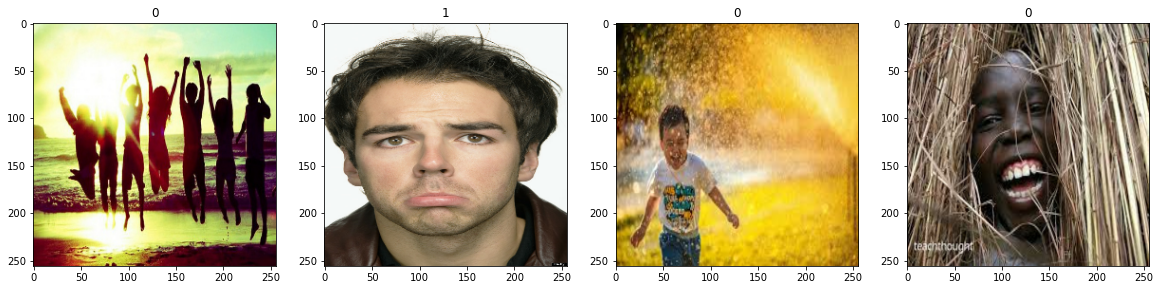

In [44]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    #print(img)
    #print(img.astype(int))
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [45]:
batch[0].min()

0.0

In [46]:
batch[0].max()

255.0

In [50]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 171 files belonging to 2 classes.


In [51]:
data = data.map(lambda x,y: (x/255, y))

In [55]:
scaled_iterator = data.as_numpy_iterator()

In [56]:
batch = scaled_iterator.next()

In [58]:
batch[0].max()

1.0

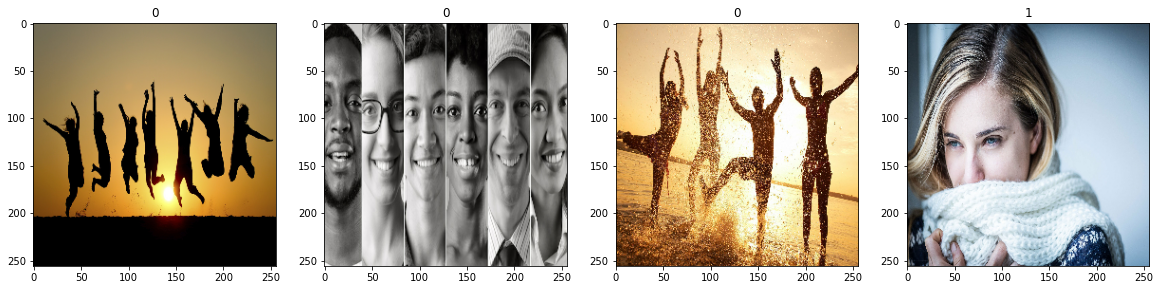

In [59]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    #print(img)
    #print(img.astype(int))
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

# 5. Split Data

In [65]:
len(data)

6

In [70]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [71]:
train_size

4

In [72]:
val_size

1

In [73]:
test_size

1

In [74]:
train_size + val_size + test_size

6

In [75]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [76]:
len(train)

4

In [77]:
len(val)

1

In [78]:
len(test)

1

# 6. Build Deep Learning Model

In [16]:
train

<TakeDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [79]:
from tensorflow.keras.models import Sequential #for single input, single output, for multiple input, multiple output, its fucntional
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [80]:
model = Sequential()

In [81]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [82]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [83]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [84]:
logdir='logs'

In [85]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [86]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 10s 2s/step - loss: 1.4969 - accuracy: 0.5703 - val_loss: 1.5195 - val_accuracy: 0.3438
Epoch 2/20
4/4 [==============================] - 8s 2s/step - loss: 0.8699 - accuracy: 0.4688 - val_loss: 0.6666 - val_accuracy: 0.8750
Epoch 3/20
4/4 [==============================] - 7s 2s/step - loss: 0.6323 - accuracy: 0.6953 - val_loss: 0.5042 - val_accuracy: 0.6562
Epoch 4/20
4/4 [==============================] - 7s 1s/step - loss: 0.5699 - accuracy: 0.6719 - val_loss: 0.5764 - val_accuracy: 0.6250
Epoch 5/20
4/4 [==============================] - 8s 2s/step - loss: 0.4713 - accuracy: 0.7422 - val_loss: 0.4179 - val_accuracy: 0.7812
Epoch 6/20
4/4 [==============================] - 8s 2s/step - loss: 0.4191 - accuracy: 0.8359 - val_loss: 0.3213 - val_accuracy: 0.8750
Epoch 7/20
4/4 [==============================] - 7s 2s/step - loss: 0.2977 - accuracy: 0.8828 - val_loss: 0.3059 - val_accuracy: 0.9375
Epoch 8/20
4/4 [========================

In [87]:
hist.history

{'loss': [1.4968624114990234,
  0.8699238300323486,
  0.6323069334030151,
  0.5698899030685425,
  0.471255898475647,
  0.4191461503505707,
  0.2976687550544739,
  0.23112565279006958,
  0.16627167165279388,
  0.09662255644798279,
  0.13030825555324554,
  0.0925103947520256,
  0.07987140119075775,
  0.0705140233039856,
  0.038647931069135666,
  0.02461133524775505,
  0.01253267377614975,
  0.010132286697626114,
  0.0073953415267169476,
  0.004329192452132702],
 'accuracy': [0.5703125,
  0.46875,
  0.6953125,
  0.671875,
  0.7421875,
  0.8359375,
  0.8828125,
  0.953125,
  0.96875,
  0.9921875,
  0.96875,
  0.96875,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [1.5195131301879883,
  0.6666487455368042,
  0.5042169094085693,
  0.576434314250946,
  0.4179297685623169,
  0.3213050365447998,
  0.30589765310287476,
  0.17092180252075195,
  0.09243421256542206,
  0.1087045669555664,
  0.0662347674369812,
  0.09918558597564697,
  0.05799504742026329,
  0.052343033254146

# 8. Plot Performance

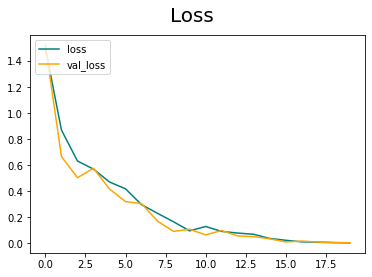

In [88]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

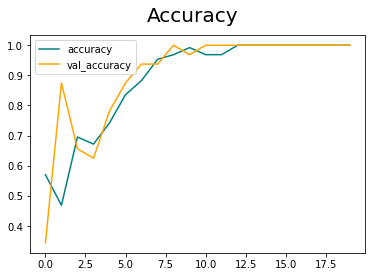

In [89]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [90]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [91]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [95]:
len(test)

1

In [93]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [94]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [98]:
print(f"precision result: {pre.result().numpy()}, recall result: {re.result().numpy()}, accuracy result: {acc.result().numpy()}")

precision result: 1.0, recall result: 1.0, accuracy result: 1.0


# 10. Test

In [31]:
import cv2

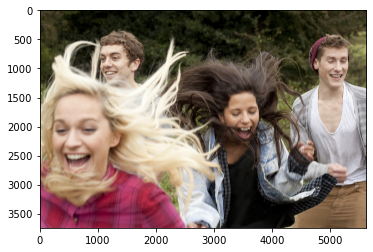

In [101]:
img = cv2.imread('154006829.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

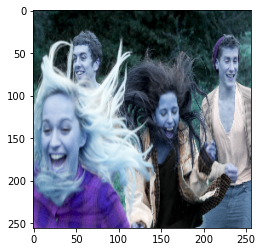

In [102]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [103]:
resize

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[ 32.32617  ,  49.32617  ,  52.32617  ],
        [ 30.0625   ,  51.285156 ,  53.285156 ],
        [ 48.658203 ,  70.6582   ,  76.6582   ],
        ...,
        [ 20.164062 ,  38.033203 ,  44.753906 ],
        [ 12.8671875,  26.59375  ,  27.076172 ],
        [  1.5351562,  21.90039  ,  17.       ]],

       [[ 36.890625 ,  52.890625 ,  58.890625 ],
        [ 41.83203  ,  59.83203  ,  66.83203  ],
        [ 44.234375 ,  64.234375 ,  69.234375 ],
        ...,
        [ 20.558594 ,  38.558594 ,  45.558594 ],
        [ 26.798828 ,  39.39258  ,  42.20508  ],
        [ 21.9375   ,  37.277344 ,  34.34375  ]],

       [[ 34.501953 ,  56.501953 ,  61.970703 ],
        [ 43.57422  ,  65.75     ,  73.9375   ],
        [ 35.54492  ,  58.210938 ,  62.15039  ],
        ...,
        [ 26.642578 ,  47.98633  ,  55.29883  ],
        [ 28.90625  ,  46.79297  ,  55.34961  ],
        [ 22.626953 ,  40.814453 ,  41.876953 ]],

       ...,

     

In [106]:
resize.shape

TensorShape([256, 256, 3])

In [105]:
np.expand_dims(resize,0)

array([[[[ 32.32617  ,  49.32617  ,  52.32617  ],
         [ 30.0625   ,  51.285156 ,  53.285156 ],
         [ 48.658203 ,  70.6582   ,  76.6582   ],
         ...,
         [ 20.164062 ,  38.033203 ,  44.753906 ],
         [ 12.8671875,  26.59375  ,  27.076172 ],
         [  1.5351562,  21.90039  ,  17.       ]],

        [[ 36.890625 ,  52.890625 ,  58.890625 ],
         [ 41.83203  ,  59.83203  ,  66.83203  ],
         [ 44.234375 ,  64.234375 ,  69.234375 ],
         ...,
         [ 20.558594 ,  38.558594 ,  45.558594 ],
         [ 26.798828 ,  39.39258  ,  42.20508  ],
         [ 21.9375   ,  37.277344 ,  34.34375  ]],

        [[ 34.501953 ,  56.501953 ,  61.970703 ],
         [ 43.57422  ,  65.75     ,  73.9375   ],
         [ 35.54492  ,  58.210938 ,  62.15039  ],
         ...,
         [ 26.642578 ,  47.98633  ,  55.29883  ],
         [ 28.90625  ,  46.79297  ,  55.34961  ],
         [ 22.626953 ,  40.814453 ,  41.876953 ]],

        ...,

        [[156.40234  ,  99.21875  , 20

In [108]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [109]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [110]:
yhat

array([[0.11195245]], dtype=float32)

In [111]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [112]:
from tensorflow.keras.models import load_model

In [113]:
model.save(os.path.join('models','imageclassifier.h5'))

In [114]:
new_model = load_model(os.path.join('models','imageclassifier.h5'))

In [116]:
new_model

In [115]:
new_model.predict(np.expand_dims(resize/255, 0))

array([[0.11195245]], dtype=float32)